In [4]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [5]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-30 17:46:02--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  19.1MB/s    in 3.8s    

2020-08-30 17:46:06 (18.3 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [6]:
df = pd.read_csv("Data-Collisions.csv", delimiter=",")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
pd.set_option("display.max.columns", None)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [8]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

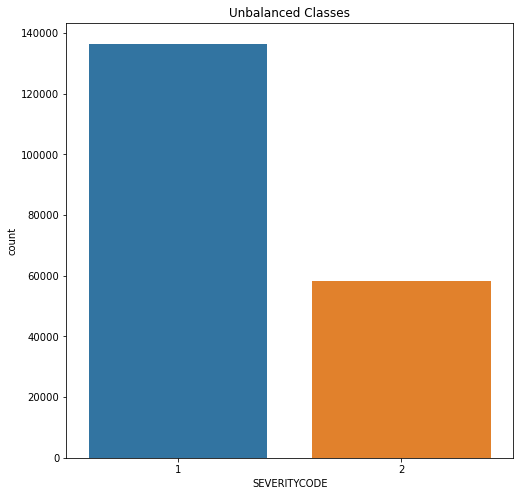

In [10]:
plt.figure(figsize=(8,8))
sns.countplot('SEVERITYCODE',data=df)
plt.title('Unbalanced Classes')
plt.show()

In [6]:
#more than twice the amount of 1 severity code than 2
#need to balance the data to get a better machine learning model

In [11]:
shuffled_df = df.sample(frac=1,random_state=4)
# this shuffles the data set 

In [12]:
sv2_df = shuffled_df.loc[shuffled_df['SEVERITYCODE']==2]
# putting all severity code 2 entries in a seperate data frame

In [13]:
sv1_df = shuffled_df.loc[shuffled_df['SEVERITYCODE']==1].sample(n=58188,random_state=42)
# randomly selecting the same amount of observations as is severity code 2

In [14]:
normalized_df = pd.concat([sv2_df,sv1_df])

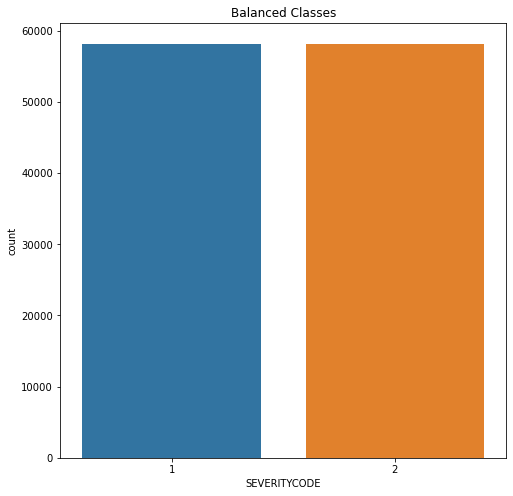

In [15]:
plt.figure(figsize=(8,8))
sns.countplot('SEVERITYCODE',data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [ ]:
# now we have the same amount of instances of both severity code 1 and 2
# this will help create a better ML model
# now we will see all the instances in each feature

In [35]:
normalized_df['WEATHER'].value_counts()

Clear                       67999
Raining                     20551
Overcast                    16794
Unknown                      6871
Snowing                       469
Other                         439
Fog/Smog/Smoke                360
Sleet/Hail/Freezing Rain       63
Blowing Sand/Dirt              35
Severe Crosswind               12
Partly Cloudy                   3
Name: WEATHER, dtype: int64

In [36]:
normalized_df['ROADCOND'].value_counts()

Dry               76101
Wet               29265
Unknown            6863
Ice                 659
Snow/Slush          516
Other                84
Standing Water       73
Sand/Mud/Dirt        41
Oil                  40
Name: ROADCOND, dtype: int64

In [37]:
normalized_df['LIGHTCOND'].value_counts()

Daylight                    71839
Dark - Street Lights On     28867
Unknown                      6071
Dusk                         3604
Dawn                         1531
Dark - No Street Lights       825
Dark - Street Lights Off      682
Other                         125
Dark - Unknown Lighting         8
Name: LIGHTCOND, dtype: int64

In [39]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [16]:
new_dataset = normalized_df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
new_dataset.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
181980,2,Raining,Wet,Daylight
1695,2,Overcast,Dry,Dark - Street Lights On
143631,2,Clear,Dry,Daylight
65001,2,Clear,Dry,Dark - Street Lights On
159841,2,Clear,Dry,Daylight


In [42]:
# need to convert categorical columns (weather, roadcond, and lightcond) 
# into numerical values so they can be used for our ML model

In [17]:
new_dataset['WEATHER'] = new_dataset['WEATHER'].astype('category')
new_dataset['ROADCOND'] = new_dataset['ROADCOND'].astype('category')
new_dataset['LIGHTCOND'] = new_dataset['LIGHTCOND'].astype('category')
new_dataset.dtypes

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

SEVERITYCODE       int64
WEATHER         category
ROADCOND        category
LIGHTCOND       category
dtype: object

In [18]:
#transforming categorical variables into numerical ones by assigning unique values to each category
new_dataset['WEATHER_CAT'] = new_dataset['WEATHER'].cat.codes
new_dataset['ROADCOND_CAT'] = new_dataset['ROADCOND'].cat.codes
new_dataset['LIGHTCOND_CAT'] = new_dataset['LIGHTCOND'].cat.codes
new_dataset.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
181980,2,Raining,Wet,Daylight,6,8,5
1695,2,Overcast,Dry,Dark - Street Lights On,4,0,2
143631,2,Clear,Dry,Daylight,1,0,5
65001,2,Clear,Dry,Dark - Street Lights On,1,0,2
159841,2,Clear,Dry,Daylight,1,0,5


In [84]:
#building the model with the new numerical columns

In [19]:
new_dataset_num = new_dataset[['SEVERITYCODE','WEATHER_CAT','ROADCOND_CAT','LIGHTCOND_CAT']]
new_dataset_num.head()

,SEVERITYCODE,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
181980,2,6,8,5
1695,2,4,0,2
143631,2,1,0,5
65001,2,1,0,2
159841,2,1,0,5


In [20]:
X = np.asarray(new_dataset_num[['WEATHER_CAT','ROADCOND_CAT','LIGHTCOND_CAT']])
X[0:5]

array([[6, 8, 5],
       [4, 0, 2],
       [1, 0, 5],
       [1, 0, 2],
       [1, 0, 5]], dtype=int8)

In [31]:
y = np.asarray(new_dataset_num['SEVERITYCODE'])
y[0:5]

array([2, 2, 2, 2, 2])

In [32]:
# normalizing the data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.15233872,  1.52995855,  0.42522086],
       [ 0.42149176, -0.67020526, -1.22653494],
       [-0.67477869, -0.67020526,  0.42522086],
       [-0.67477869, -0.67020526, -1.22653494],
       [-0.67477869, -0.67020526,  0.42522086]])

In [33]:
# splitting the data into a training and testing portion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (93100, 3) (93100,)
Test set: (23276, 3) (23276,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
# the model can now predict weather the severity code will be 1 or 2
yhat = LR.predict(X_test)
yhat

array([2, 2, 2, ..., 1, 2, 2])

In [36]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.47093806, 0.52906194],
       [0.46358766, 0.53641234],
       [0.47086504, 0.52913496],
       ...,
       [0.53785231, 0.46214769],
       [0.47086504, 0.52913496],
       [0.46351478, 0.53648522]])

In [37]:
# jaccard index accuracy evaluation
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.5273672452311394

In [38]:
# log loss evaluation
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6845844607941294

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[4127    0]
 [   0    0]]


Confusion matrix, without normalization
[[4127 7537]
 [3464 8148]]


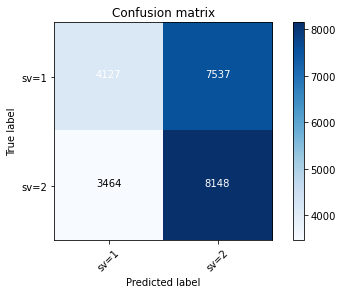

In [40]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['sv=1','sv=2'],normalize= False,  title='Confusion matrix')

In [41]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.54      0.35      0.43     11664
           2       0.52      0.70      0.60     11612

   micro avg       0.53      0.53      0.53     23276
   macro avg       0.53      0.53      0.51     23276
weighted avg       0.53      0.53      0.51     23276

